In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from os import XATTR_CREATE
from pandas.core.common import random_state
from sklearn.utils.extmath import randomized_range_finder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
import statsmodels.api as sm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
url = 'https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv'
df = pd.read_csv(url)
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


variable meanings: 
https://sleepdata.org/datasets/shhs/variables

# Brief EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [ ]:
df.nunique()

cvd_4types        2
age_s1           52
race              3
educat            4
mstat             5
hip             160
neck20          180
waist           174
av_weight_kg    370
cgpkyr          331
tea15            15
srhype            2
parrptdiab        2
bend25            3
happy25           6
tired25           6
hlthlm25          5
dtype: int64

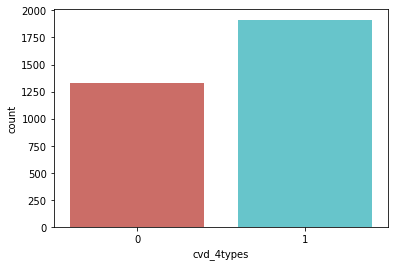

In [ ]:
# check dataset balance
sns.countplot(x = 'cvd_4types', data = df, palette = 'hls')
plt.show()

As we can see there are more "1" - "Risk Present" than "0" - "No Risk". This indicates a imbalance in our dataset. We need to do something about. But we will get to that later. 

Text(0, 0.5, 'Frequency of Risk')

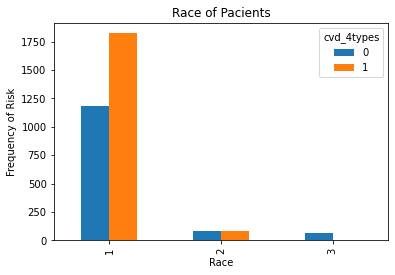

In [ ]:
# race
%matplotlib inline
pd.crosstab(df.race, df.cvd_4types).plot(kind = 'bar') 
plt.title('Race of Pacients')
plt.xlabel('Race')
plt.ylabel('Frequency of Risk')

Text(0, 0.5, 'Frequency of Risk')

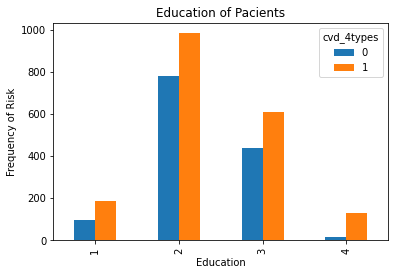

In [ ]:
# educat
%matplotlib inline
pd.crosstab(df.educat, df.cvd_4types).plot(kind = 'bar') 
plt.title('Education of Pacients')
plt.xlabel('Education')
plt.ylabel('Frequency of Risk')

Text(0, 0.5, 'Frequency of Risk')

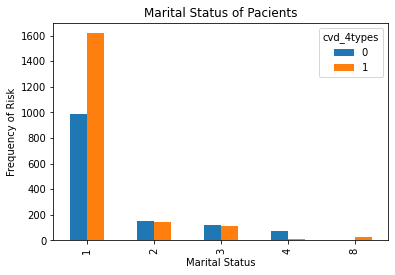

In [ ]:
# marital status
%matplotlib inline
pd.crosstab(df.mstat, df.cvd_4types).plot(kind = 'bar') 
plt.title('Marital Status of Pacients')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Risk')

Text(0, 0.5, 'Frequency of Risk')

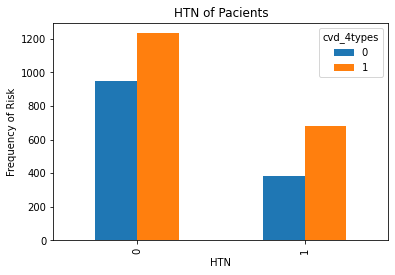

In [ ]:
# Self-reported hypertension
%matplotlib inline
pd.crosstab(df.srhype, df.cvd_4types).plot(kind = 'bar') 
plt.title('HTN of Pacients')
plt.xlabel('HTN')
plt.ylabel('Frequency of Risk')

Text(0, 0.5, 'Frequency')

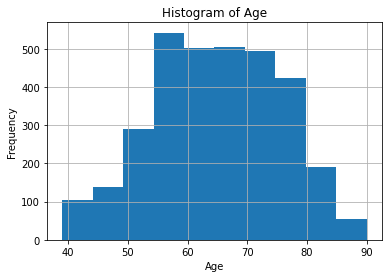

In [ ]:
# age
df.age_s1.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('hist_age')

# PART I: Building Logistic Regression Model

### Model 0

In [ ]:
# define a function to get metrics
def model_eval(y_test, y_pred): 
  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Classification report
  cr = classification_report(y_test, y_pred)

  print(cm)
  print("-"*50)
  print(cr)
  plot_roc_curve(logreg, X_test, y_test) 
  plt.show()

In [ ]:
X = df.loc[:, df.columns != 'cvd_4types']
y = df.loc[:, df.columns == 'cvd_4types']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify=y) # add stratified sampling to train test split

# define model
logreg = LogisticRegression(C=1e40, solver='newton-cg')

# fit model
logreg.fit(X_train, y_train)

# make prediction
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[189 210]
 [ 78 496]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.47      0.57       399
           1       0.70      0.86      0.77       574

    accuracy                           0.70       973
   macro avg       0.71      0.67      0.67       973
weighted avg       0.70      0.70      0.69       973



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


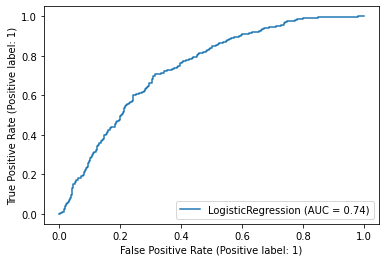

In [ ]:
model_eval(y_test, y_pred)

**Interesting Observation:**

As the metrics shown, the model's accuracy is acceptable, however, the recall of the model is very poor. Which is a little strange actually. The sample data has more positive than negative, one would assume a model trained on such data would be good at predicting positive cases. However, the recall for positive prediction is very poor at 47%, and the recall for prediction negative is 86%. 

In any case, this is not a reliable model. We will do some balancing using both under-sampling and over-sampling techniques.

### Model 1 - under-sampling

Let's try undersampling

In [ ]:
df.cvd_4types.value_counts()

1    1913
0    1329
Name: cvd_4types, dtype: int64

In [ ]:
# get count for no risk
num_norisk = len(df[df['cvd_4types'] == 0])

# get indices for risk present samples
risk_indices = df[df.cvd_4types == 1].index

# random sample of risk present data
random_indices = np.random.choice(risk_indices,num_norisk, replace=False)

# get indices for no risk data
norisk_indices = df[df.cvd_4types == 0].index

# concat risk and no risk data
under_sample_indices = np.concatenate([norisk_indices,random_indices])

# get the under sampled df
df_under = df.loc[under_sample_indices]
print(df_under.cvd_4types.value_counts())

0    1329
1    1329
Name: cvd_4types, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[254 166]
 [112 266]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.60      0.65       420
           1       0.62      0.70      0.66       378

    accuracy                           0.65       798
   macro avg       0.65      0.65      0.65       798
weighted avg       0.66      0.65      0.65       798



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


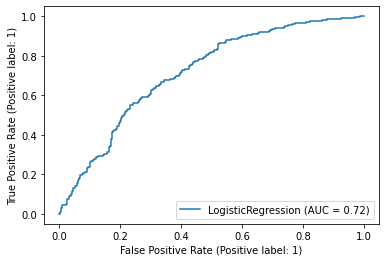

In [ ]:
X = df_under.loc[:, df_under.columns != 'cvd_4types']
y = df_under.loc[:, df_under.columns == 'cvd_4types']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# define model
logreg = LogisticRegression(C=1e40, solver='newton-cg')

# fit model
logreg.fit(X_train, y_train)

# make prediction
y_pred = logreg.predict(X_test)

model_eval(y_test, y_pred)

Undersampling performs slightly more reliable than using the unchanged dataset. But let's see if we can do better by using SMOTE


As we can see the model is not quite satisfying. Let's try use a different sample method

### Model 2 - over-sampling with SMOTE

First we need to balance our dataset. <br>
In this project we will use SMOTE over-sampling technique <br>
At a high level, [SMOTE](https://arxiv.org/pdf/1106.1813.pdf):

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [ ]:
# seperate dependent and independent variables 
X = df.loc[:, df.columns != 'cvd_4types']
y = df.loc[:, df.columns == 'cvd_4types']

In [ ]:
# set random state to 101 so the randomness can be recreated, change to 0 for random every run
os = SMOTE() 

# split data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
columns = X_train.columns 

os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['cvd_4types'])

# check the numbers of our data
print('Length of oversampled data is ', len(os_data_X))
print('Number of "No Risk" in oversampled data is ', len(os_data_y[os_data_y['cvd_4types'] == 0]))
print('Number of "Risk Present" is ',  len(os_data_y[os_data_y['cvd_4types'] == 1]))
print('Proportion of "No Risk" data in oversampled data is ', len(os_data_y[os_data_y['cvd_4types'] == 0])/len(os_data_X))
print('Proportion of "Risk Present" data in oversampled data is ', len(os_data_y[os_data_y['cvd_4types'] == 1])/len(os_data_X))

Length of oversampled data is  2710
Number of "No Risk" in oversampled data is  1355
Number of "Risk Present" is  1355
Proportion of "No Risk" data in oversampled data is  0.5
Proportion of "Risk Present" data in oversampled data is  0.5


Now the sample data has been balanced we can start building our logistic regression model

In [ ]:
# define model
logreg = LogisticRegression(C=1e40, solver='newton-cg')

# fit model
logreg = logreg.fit(os_data_X, os_data_y)

# make prediction
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[272 143]
 [198 360]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.66      0.61       415
           1       0.72      0.65      0.68       558

    accuracy                           0.65       973
   macro avg       0.65      0.65      0.65       973
weighted avg       0.66      0.65      0.65       973



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


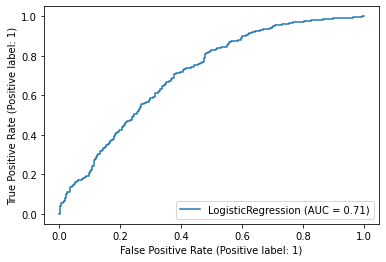

In [ ]:
model_eval(y_test, y_pred)

### Model 3: continuation of Model 2

**Recursive Feature Elimination**

[Recursive Feature Elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select feature by recursively considering smaller and smaller sets of features.

In [ ]:
# get a list of variables
data_final_vars = df.columns.tolist()
y = ['cvd_4types']
X = [i for i in data_final_vars if i not in y]

rfe = RFE(logreg, n_features_to_select = 12)
rfe = rfe.fit(os_data_X, os_data_y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[False  True  True  True  True  True  True False False False  True  True
  True  True  True  True]
[5 1 1 1 1 1 1 2 4 3 1 1 1 1 1 1]


In [ ]:
# get selected features
X_selected = []

for i in range(len(rfe.support_)):
  if rfe.support_[i] == True:
    X_selected.append(X[i])
X_selected

['race',
 'educat',
 'mstat',
 'hip',
 'neck20',
 'waist',
 'srhype',
 'parrptdiab',
 'bend25',
 'happy25',
 'tired25',
 'hlthlm25']

In [ ]:
# set X and y
X = os_data_X[X_selected]
y = os_data_y['cvd_4types']

# select variables based on statistics 
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.614527
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.113     
Dependent Variable: cvd_4types       AIC:              3354.7340 
Date:               2022-03-29 23:38 BIC:              3425.5904 
No. Observations:   2710             Log-Likelihood:   -1665.4   
Df Model:           11               LL-Null:          -1878.4   
Df Residuals:       2698             LLR p-value:      1.7261e-84
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
race         -0.7608    0.1482   -5.1341  0.0000  -1.0513  -0.4704
educat        0.4972    0.0630    7.8876  0.0000   0.3737   0.

Judging from the p-val, there are a number of variables that should be excluded from the model.

In [ ]:
cols = [
 'race',
 'educat',
 'hip',
 'neck20',
 'waist',
 'av_weight_kg',
 'srhype',
 'parrptdiab',
 'bend25',
 'happy25',
 'tired25',
 'hlthlm25']

X = os_data_X[cols]
y = os_data_y['cvd_4types']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.612867
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.116     
Dependent Variable: cvd_4types       AIC:              3345.7396 
Date:               2022-03-29 23:38 BIC:              3416.5960 
No. Observations:   2710             Log-Likelihood:   -1660.9   
Df Model:           11               LL-Null:          -1878.4   
Df Residuals:       2698             LLR p-value:      2.1114e-86
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
race          -0.7212    0.1473  -4.8975  0.0000  -1.0099  -0.4326
educat         0.4944    0.0631   7.8402  0.0000   0.3708   0.

In [ ]:
# build logreg model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logreg = LogisticRegression(C=1e40, solver='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

[[253 146]
 [137 277]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       399
           1       0.65      0.67      0.66       414

    accuracy                           0.65       813
   macro avg       0.65      0.65      0.65       813
weighted avg       0.65      0.65      0.65       813



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


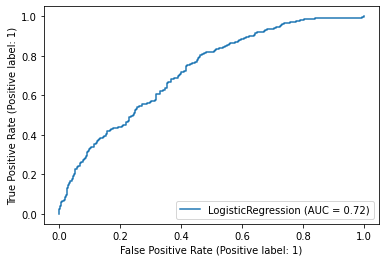

In [ ]:
model_eval(y_test, y_pred)

### Model 4: Hyperparameter tuning - GridSearchCV 

Continuation of Model 3

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2', 'l1']
c_values = [10, 1.0, 0.1, 0.01, 0.0001, 1e40]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# get hyperparameters
params = grid_result.best_params_
print(params)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

[[253 146]
 [135 279]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       399
           1       0.66      0.67      0.67       414

    accuracy                           0.65       813
   macro avg       0.65      0.65      0.65       813
weighted avg       0.65      0.65      0.65       813



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


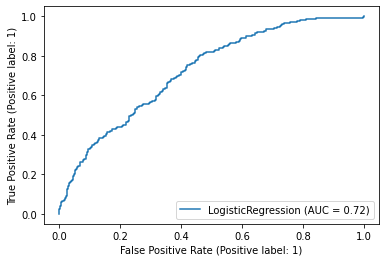

In [ ]:
logreg = LogisticRegression(C=1, solver='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
model_eval(y_test, y_pred)

# PART II: Feature Importance

In [ ]:
# use random forest classifier for feature importance

# fit random forest
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
# get feature importance
rf.feature_importances_

# turn it into a dataframe
pd.DataFrame(rf.feature_importances_, index = X.columns, 
            columns = ['Importance']).sort_values(['Importance'], 
            ascending = False)

,Importance
waist,0.189482
av_weight_kg,0.170191
hip,0.161987
neck20,0.153934
hlthlm25,0.064500
educat,0.060316
happy25,0.054898
tired25,0.052110
bend25,0.038193
srhype,0.023399
